In [1]:
from os.path import join
import numpy as np    

from flyeye.data.experiments import Experiment

from figures.dynamics import DualExpression
from figures.comparison import PerturbationComparison

%matplotlib inline

data_path = '../data/published'

# Load SevRasV12 experiment data

In [2]:
ras_control = Experiment(join(data_path, 'ras_mutant', 'control'), normalization='ch0', recompile=True)
ras_perturbation = Experiment(join(data_path, 'ras_mutant', 'perturbation'), normalization='ch0', recompile=True)

# evaluate P/Y ratio
ras_control.set_ratio('ch1_normalized', 'ch2_normalized')
ras_perturbation.set_ratio('ch1_normalized', 'ch2_normalized')

# manually align control condition (falls ~10h early by default)
ras_control.apply_lag(lag=10)

# Figure 6 A-C

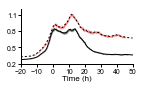

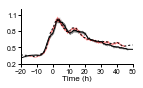

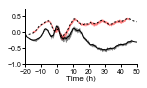

In [3]:
# define number of bootstrap samples (10k used for manuscript)
interval_kw = dict(nbootstraps=10) 

# Fig 6A (Pnt levels)
fig = DualExpression(ras_control, ras_perturbation)
ax_kw = dict(xlim=(-20, 50), xticks=np.arange(-20, 55, 10), 
             ylim=(.2, 1.2), yticks=np.arange(.2, 1.3, .3))
fig.render('ch1_normalized', interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 6B (Yan levels)
fig = DualExpression(ras_control, ras_perturbation)
ax_kw = dict(xlim=(-20, 50), xticks=np.arange(-20, 55, 10), 
             ylim=(.2, 1.2), yticks=np.arange(.2, 1.3, .3))
fig.render('ch2_normalized', interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Fig 6C (Ratio)
fig = DualExpression(ras_control, ras_perturbation)
ax_kw = dict(xlim=(-20, 50), xticks=np.arange(-20, 55, 10), 
             ylim=(-1, 0.7), yticks=np.arange(-1, .6, .5))
fig.render('logratio', interval=True, ax_kw=ax_kw, interval_kw=interval_kw)

# Figure 6 D,E

/Users/Sebi/Documents/grad_school/research/ratio/code/figures/comparison.py:769: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  selected.sort_values(by='t', inplace=True)


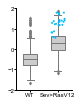

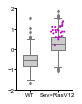

In [5]:
# Fig 6D (unidentifiable supernumerary neurons)
fig = PerturbationComparison.from_experiments(ras_control, 
                                                ras_perturbation, 
                                                reference=['er'])
fig.render()

# Fig 6E (supernumerary R7 neurons)
fig = PerturbationComparison.from_experiments(ras_control, 
                                                ras_perturbation, 
                                                reference=['er7'])
fig.render()